# Isothermal reactor

In [7]:

import sys
import numpy as np
import pandas as pd
import cantera as ct

gas = ct.Solution('./ch41step.xml')
R = rxns = ct.Reaction.listFromFile('./ch41step.xml')
myreaction  = R[0]



iCO2 = gas.species_index('CO2')
iH2O = gas.species_index('H2O')
iO2 = gas.species_index('O2')
iCH4 = gas.species_index('CH4')

transient_data = pd.DataFrame()
constant_data = pd.DataFrame()

for T in np.arange(1000,3001,1):
    print("T: " +  str(T))
    gas.TPY = T, ct.one_atm, 'CH4:1,O2:2'
    r = ct.IdealGasConstPressureReactor(gas, energy = 'off')
    sim = ct.ReactorNet([r])
    time = 0.0
    states = ct.SolutionArray(gas, extra=['t'])

#     print('%10s %10s %10s %14s %10s %10s %10s %14s %10s %10s %10s %14s ' % ('t [s]','T [K]'
#                                     ,'Yco2','Yh2o','Yo2','Ych4','P [Pa]'
#                                     ,'kf','kb','Ea','A','b'))
#     print('%10.3e %10.3f %10.3f %14.6e %14.3e %14.3e %14.3e %14.6e %14.3e %14.3e %14.3e  %14.3e' % (
#                                                 sim.time, r.T, r.Y[iCO2], 
#                                                 r.Y[iH2O], r.Y[iO2], r.Y[iCH4], 
#                                                 r.thermo.P, gas.forward_rate_constants, 
#                                                 gas.reverse_rate_constants, myreaction.rate.activation_energy, myreaction.rate.pre_exponential_factor,myreaction.rate.temperature_exponent))
    transient_data = transient_data.append({'t [s]': sim.time, 'T [K]':  r.T
                                    ,'Yco2': r.Y[iCO2],'Yh2o': r.Y[iH2O],'Yo2':r.Y[iO2],'Ych4':r.Y[iCH4]},ignore_index=True)
    constant_data = constant_data.append({'T [K]':  r.T, 'P [Pa]': r.thermo.P, 'kf': gas.forward_rate_constants, 
                                          'kb':gas.reverse_rate_constants, 'Ea':myreaction.rate.activation_energy, 
                                          'A': myreaction.rate.pre_exponential_factor,
                                          'b': myreaction.rate.temperature_exponent},ignore_index=True)
    for n in range(50):
        time += 5.e-7
        sim.advance(time)
        states.append(r.thermo.state, t=time*1e3)
        transient_data = transient_data.append({'t [s]': sim.time, 'T [K]':  r.T
                                    ,'Yco2': r.Y[iCO2],'Yh2o': r.Y[iH2O],'Yo2':r.Y[iO2],'Ych4':r.Y[iCH4]},ignore_index=True)

#         print('%10.3e %10.3f %10.3f %14.6e %14.3e %14.3e %14.3e %14.6e %14.3e %14.3e %14.3e  %14.3e' % (
#                                                 sim.time, r.T,  r.Y[iCO2], 
#                                                 r.Y[iH2O], r.Y[iO2], r.Y[iCH4], gas.forward_rate_constants, r.thermo.P,
#                                                 gas.reverse_rate_constants, myreaction.rate.activation_energy, myreaction.rate.pre_exponential_factor,myreaction.rate.temperature_exponent))


transient_data.to_csv('transient_data_ch41step.csv') 
constant_data.to_csv('constant_data_ch41step.csv') 


T: 1000
T: 1001
T: 1002
T: 1003
T: 1004
T: 1005
T: 1006
T: 1007
T: 1008
T: 1009
T: 1010
T: 1011
T: 1012
T: 1013
T: 1014
T: 1015
T: 1016
T: 1017
T: 1018
T: 1019
T: 1020
T: 1021
T: 1022
T: 1023
T: 1024
T: 1025
T: 1026
T: 1027
T: 1028
T: 1029
T: 1030
T: 1031
T: 1032
T: 1033
T: 1034
T: 1035
T: 1036
T: 1037
T: 1038
T: 1039
T: 1040
T: 1041
T: 1042
T: 1043
T: 1044
T: 1045
T: 1046
T: 1047
T: 1048
T: 1049
T: 1050
T: 1051
T: 1052
T: 1053
T: 1054
T: 1055
T: 1056
T: 1057
T: 1058
T: 1059
T: 1060
T: 1061
T: 1062
T: 1063
T: 1064
T: 1065
T: 1066
T: 1067
T: 1068
T: 1069
T: 1070
T: 1071
T: 1072
T: 1073
T: 1074
T: 1075
T: 1076
T: 1077
T: 1078
T: 1079
T: 1080
T: 1081
T: 1082
T: 1083
T: 1084
T: 1085
T: 1086
T: 1087
T: 1088
T: 1089
T: 1090
T: 1091
T: 1092
T: 1093
T: 1094
T: 1095
T: 1096
T: 1097
T: 1098
T: 1099
T: 1100
T: 1101
T: 1102
T: 1103
T: 1104
T: 1105
T: 1106
T: 1107
T: 1108
T: 1109
T: 1110
T: 1111
T: 1112
T: 1113
T: 1114
T: 1115
T: 1116
T: 1117
T: 1118
T: 1119
T: 1120
T: 1121
T: 1122
T: 1123
T: 1124


T: 2027
T: 2028
T: 2029
T: 2030
T: 2031
T: 2032
T: 2033
T: 2034
T: 2035
T: 2036
T: 2037
T: 2038
T: 2039
T: 2040
T: 2041
T: 2042
T: 2043
T: 2044
T: 2045
T: 2046
T: 2047
T: 2048
T: 2049
T: 2050
T: 2051
T: 2052
T: 2053
T: 2054
T: 2055
T: 2056
T: 2057
T: 2058
T: 2059
T: 2060
T: 2061
T: 2062
T: 2063
T: 2064
T: 2065
T: 2066
T: 2067
T: 2068
T: 2069
T: 2070
T: 2071
T: 2072
T: 2073
T: 2074
T: 2075
T: 2076
T: 2077
T: 2078
T: 2079
T: 2080
T: 2081
T: 2082
T: 2083
T: 2084
T: 2085
T: 2086
T: 2087
T: 2088
T: 2089
T: 2090
T: 2091
T: 2092
T: 2093
T: 2094
T: 2095
T: 2096
T: 2097
T: 2098
T: 2099
T: 2100
T: 2101
T: 2102
T: 2103
T: 2104
T: 2105
T: 2106
T: 2107
T: 2108
T: 2109
T: 2110
T: 2111
T: 2112
T: 2113
T: 2114
T: 2115
T: 2116
T: 2117
T: 2118
T: 2119
T: 2120
T: 2121
T: 2122
T: 2123
T: 2124
T: 2125
T: 2126
T: 2127
T: 2128
T: 2129
T: 2130
T: 2131
T: 2132
T: 2133
T: 2134
T: 2135
T: 2136
T: 2137
T: 2138
T: 2139
T: 2140
T: 2141
T: 2142
T: 2143
T: 2144
T: 2145
T: 2146
T: 2147
T: 2148
T: 2149
T: 2150
T: 2151


In [1]:
import matplotlib.pyplot as plt
plt.plot(transient_data['t [s]'],transient_data['Yco2'])
plt.plot(transient_data['t [s]'],transient_data['Yo2'])
plt.plot(transient_data['t [s]'],transient_data['Ych4'])
plt.plot(transient_data['t [s]'],transient_data['Yh2o'])

NameError: name 'transient_data' is not defined

In [102]:
# Plot the results if matplotlib is installed.
# See http://matplotlib.org/ to get it.
import matplotlib.pyplot as plt
plt.clf()
plt.subplot(2, 2, 1)
plt.plot(states.t, states.T)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.subplot(2, 2, 2)
plt.plot(states.t, states.X[:,gas.species_index('OH')])
plt.xlabel('Time (ms)')
plt.ylabel('OH Mole Fraction')
plt.subplot(2, 2, 3)
plt.plot(states.t, states.X[:,gas.species_index('H')])
plt.xlabel('Time (ms)')
plt.ylabel('H Mole Fraction')
plt.subplot(2, 2, 4)
plt.plot(states.t, states.X[:,gas.species_index('H2')])
plt.xlabel('Time (ms)')
plt.ylabel('H2 Mole Fraction')
plt.tight_layout()
plt.show()


IndentationError: unexpected indent (<ipython-input-102-0f5b79005f5a>, line 3)

In [73]:
gas.TPX = 2001.0, ct.one_atm, 'CH4:1,O2:2'

A = 3.47850e+08
b = 0.0 
Ea =8.368e+07 #in cal/mol

kf = A*1001**b *np.exp(-Ea/(ct.gas_constant*1001))
kf

14957.153361661354

In [10]:

import sys
import numpy as np
import pandas as pd
import cantera as ct

gas = ct.Solution('./ch41step.xml')
R = rxns = ct.Reaction.listFromFile('./ch41step.xml')
myreaction  = R[0]



iCO2 = gas.species_index('CO2')
iH2O = gas.species_index('H2O')
iO2 = gas.species_index('O2')
iCH4 = gas.species_index('CH4')

transient_data = pd.DataFrame()
constant_data = pd.DataFrame()

for T in np.arange(400,2401,1):
    print("T: " +  str(T))
    gas.TPY = T, ct.one_atm, 'CH4:1,O2:2'
    r = ct.IdealGasConstPressureReactor(gas, energy = 'on')
    sim = ct.ReactorNet([r])
    time = 0.0
    states = ct.SolutionArray(gas, extra=['t'])

#     print('%10s %10s %10s %14s %10s %10s %10s %14s %10s %10s %10s %14s ' % ('t [s]','T [K]'
#                                     ,'Yco2','Yh2o','Yo2','Ych4','P [Pa]'
#                                     ,'kf','kb','Ea','A','b'))
#     print('%10.3e %10.3f %10.3f %14.6e %14.3e %14.3e %14.3e %14.6e %14.3e %14.3e %14.3e  %14.3e' % (
#                                                 sim.time, r.T, r.Y[iCO2], 
#                                                 r.Y[iH2O], r.Y[iO2], r.Y[iCH4], 
#                                                 r.thermo.P, gas.forward_rate_constants, 
#                                                 gas.reverse_rate_constants, myreaction.rate.activation_energy, myreaction.rate.pre_exponential_factor,myreaction.rate.temperature_exponent))
    transient_data = transient_data.append({'t [s]': sim.time, 'initT': T, 'T [K]':  r.T
                                    ,'Yco2': r.Y[iCO2],'Yh2o': r.Y[iH2O],'Yo2':r.Y[iO2],'Ych4':r.Y[iCH4]},ignore_index=True)
    constant_data = constant_data.append({'T [K]':  T, 'P [Pa]': r.thermo.P, 'kf': gas.forward_rate_constants, 
                                          'kb':gas.reverse_rate_constants, 'Ea':myreaction.rate.activation_energy, 
                                          'A': myreaction.rate.pre_exponential_factor,
                                          'b': myreaction.rate.temperature_exponent},ignore_index=True)
    for n in range(50):
        time += 5.e-7
        sim.advance(time)
        states.append(r.thermo.state, t=time*1e3)
        transient_data = transient_data.append({'t [s]': sim.time, 'initT': T, 'T [K]':  r.T, 'kf': gas.forward_rate_constants
                                    ,'Yco2': r.Y[iCO2],'Yh2o': r.Y[iH2O],'Yo2':r.Y[iO2],'Ych4':r.Y[iCH4]},ignore_index=True)

#         print('%10.3e %10.3f %10.3f %14.6e %14.3e %14.3e %14.3e %14.6e %14.3e %14.3e %14.3e  %14.3e' % (
#                                                 sim.time, r.T,  r.Y[iCO2], 
#                                                 r.Y[iH2O], r.Y[iO2], r.Y[iCH4], gas.forward_rate_constants, r.thermo.P,
#                                                 gas.reverse_rate_constants, myreaction.rate.activation_energy, myreaction.rate.pre_exponential_factor,myreaction.rate.temperature_exponent))


transient_data.to_csv('transient_energy_data_ch41step.csv') 
constant_data.to_csv('constant_energy_data_ch41step.csv') 


T: 400
T: 401
T: 402
T: 403
T: 404
T: 405
T: 406
T: 407
T: 408
T: 409
T: 410
T: 411
T: 412
T: 413
T: 414
T: 415
T: 416
T: 417
T: 418
T: 419
T: 420
T: 421
T: 422
T: 423
T: 424
T: 425
T: 426
T: 427
T: 428
T: 429
T: 430
T: 431
T: 432
T: 433
T: 434
T: 435
T: 436
T: 437
T: 438
T: 439
T: 440
T: 441
T: 442
T: 443
T: 444
T: 445
T: 446
T: 447
T: 448
T: 449
T: 450
T: 451
T: 452
T: 453
T: 454
T: 455
T: 456
T: 457
T: 458
T: 459
T: 460
T: 461
T: 462
T: 463
T: 464
T: 465
T: 466
T: 467
T: 468
T: 469
T: 470
T: 471
T: 472
T: 473
T: 474
T: 475
T: 476
T: 477
T: 478
T: 479
T: 480
T: 481
T: 482
T: 483
T: 484
T: 485
T: 486
T: 487
T: 488
T: 489
T: 490
T: 491
T: 492
T: 493
T: 494
T: 495
T: 496
T: 497
T: 498
T: 499
T: 500
T: 501
T: 502
T: 503
T: 504
T: 505
T: 506
T: 507
T: 508
T: 509
T: 510
T: 511
T: 512
T: 513
T: 514
T: 515
T: 516
T: 517
T: 518
T: 519
T: 520
T: 521
T: 522
T: 523
T: 524
T: 525
T: 526
T: 527
T: 528
T: 529
T: 530
T: 531
T: 532
T: 533
T: 534
T: 535
T: 536
T: 537
T: 538
T: 539
T: 540
T: 541
T: 542

T: 1500
T: 1501
T: 1502
T: 1503
T: 1504
T: 1505
T: 1506
T: 1507
T: 1508
T: 1509
T: 1510
T: 1511
T: 1512
T: 1513
T: 1514
T: 1515
T: 1516
T: 1517
T: 1518
T: 1519
T: 1520
T: 1521
T: 1522
T: 1523
T: 1524
T: 1525
T: 1526
T: 1527
T: 1528
T: 1529
T: 1530
T: 1531
T: 1532
T: 1533
T: 1534
T: 1535
T: 1536
T: 1537
T: 1538
T: 1539
T: 1540
T: 1541
T: 1542
T: 1543
T: 1544
T: 1545
T: 1546
T: 1547
T: 1548
T: 1549
T: 1550
T: 1551
T: 1552
T: 1553
T: 1554
T: 1555
T: 1556
T: 1557
T: 1558
T: 1559
T: 1560
T: 1561
T: 1562
T: 1563
T: 1564
T: 1565
T: 1566
T: 1567
T: 1568
T: 1569
T: 1570
T: 1571
T: 1572
T: 1573
T: 1574
T: 1575
T: 1576
T: 1577
T: 1578
T: 1579
T: 1580
T: 1581
T: 1582
T: 1583
T: 1584
T: 1585
T: 1586
T: 1587
T: 1588
T: 1589
T: 1590
T: 1591
T: 1592
T: 1593
T: 1594
T: 1595
T: 1596
T: 1597
T: 1598
T: 1599
T: 1600
T: 1601
T: 1602
T: 1603
T: 1604
T: 1605
T: 1606
T: 1607
T: 1608
T: 1609
T: 1610
T: 1611
T: 1612
T: 1613
T: 1614
T: 1615
T: 1616
T: 1617
T: 1618
T: 1619
T: 1620
T: 1621
T: 1622
T: 1623
T: 1624


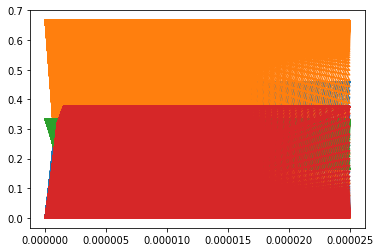

In [7]:
import matplotlib.pyplot as plt
plt.plot(transient_data['t [s]'],transient_data['Yco2'])
plt.plot(transient_data['t [s]'],transient_data['Yo2'])
plt.plot(transient_data['t [s]'],transient_data['Ych4'])
plt.plot(transient_data['t [s]'],transient_data['Yh2o'])

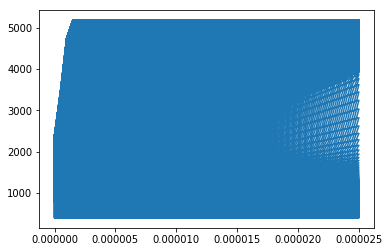

In [8]:
plt.plot(transient_data['t [s]'],transient_data['T [K]'])